 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [3]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [4]:
# Reading whale returns
wr_csv = Path("Resources/whale_returns.csv")
whale_returns = pd.read_csv(wr_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_returns = whale_returns.sort_index()
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [5]:
# Count nulls
print(whale_returns.isnull().sum())
print(whale_returns[whale_returns.isnull().any(axis =1)])

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64
            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02                          NaN                     NaN  


In [6]:
# Drop nulls
whale_returns.dropna(inplace=True)
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [7]:

# Reading algorithmic returns
ar_csv = Path("Resources/algo_returns.csv")
algo_returns = pd.read_csv(ar_csv, index_col="Date", parse_dates = True, infer_datetime_format=True)
algo_returns.sort_index(ascending = True, inplace = True)
algo_returns.head(100)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2014-10-10,-0.012612,-0.011752
2014-10-13,-0.018528,-0.002009
2014-10-14,0.000702,0.004501


In [8]:
# Count nulls
print(algo_returns.isnull().sum())

Algo 1    0
Algo 2    6
dtype: int64


In [9]:
# Drop nulls
algo_returns.dropna(inplace=True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [10]:
# Reading S&P 500 Closing Prices
sp500_his_csv = Path("Resources/sp500_history.csv")
sp500_his = pd.read_csv(sp500_his_csv, index_col="Date", parse_dates = True, infer_datetime_format=True)
sp500_his = sp500_his.sort_index()
sp500_his.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [11]:
# Check Data Types
sp500_his.dtypes

Close    object
dtype: object

In [12]:
# Fix Data Types
sp500_his["Close"]= sp500_his["Close"].str.replace('$','').astype("float")
sp500_his.sort_index(inplace = True)
sp500_his

C:\Users\Expli\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
...,...
2019-04-16,2907.06
2019-04-17,2900.45
2019-04-18,2905.03


In [13]:
# Calculate Daily Returns
sp500_dr = sp500_his.pct_change()

In [14]:
# Drop nulls
sp500_dr.dropna(inplace=True)
sp500_dr.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [15]:
# Rename `Close` Column to be specific to this portfolio.
sp500_dr.rename(columns = {"Close":"sp500"}, inplace = True)

## Combine Whale, Algorithmic, and S&P 500 Returns

In [16]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
total_dr = pd.concat([whale_returns, algo_returns,sp500_dr], axis = "columns",join = "inner")

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

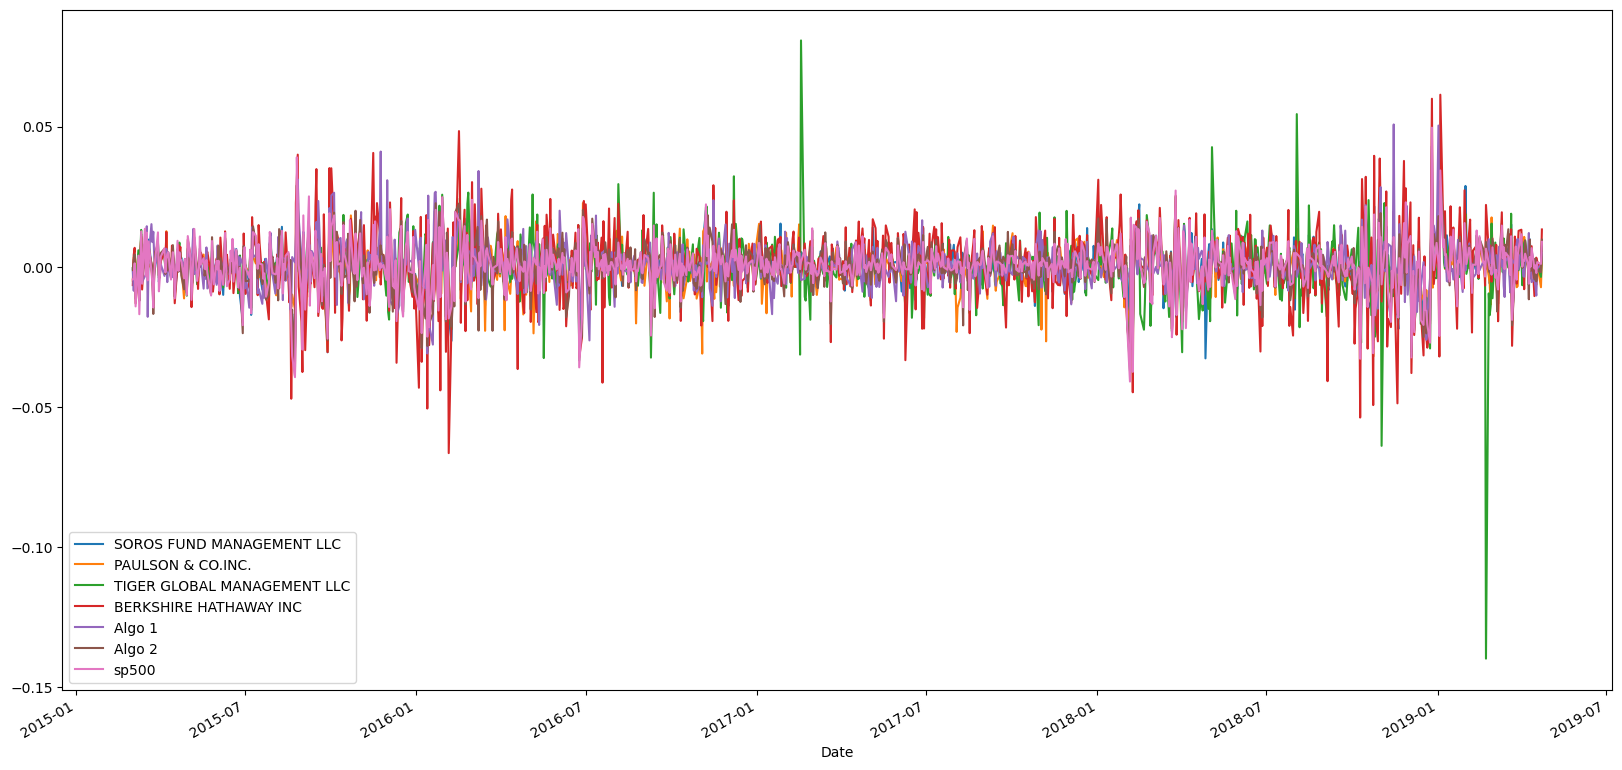

In [17]:
# Plot daily returns of all portfolios
total_dr.plot(figsize = (20,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

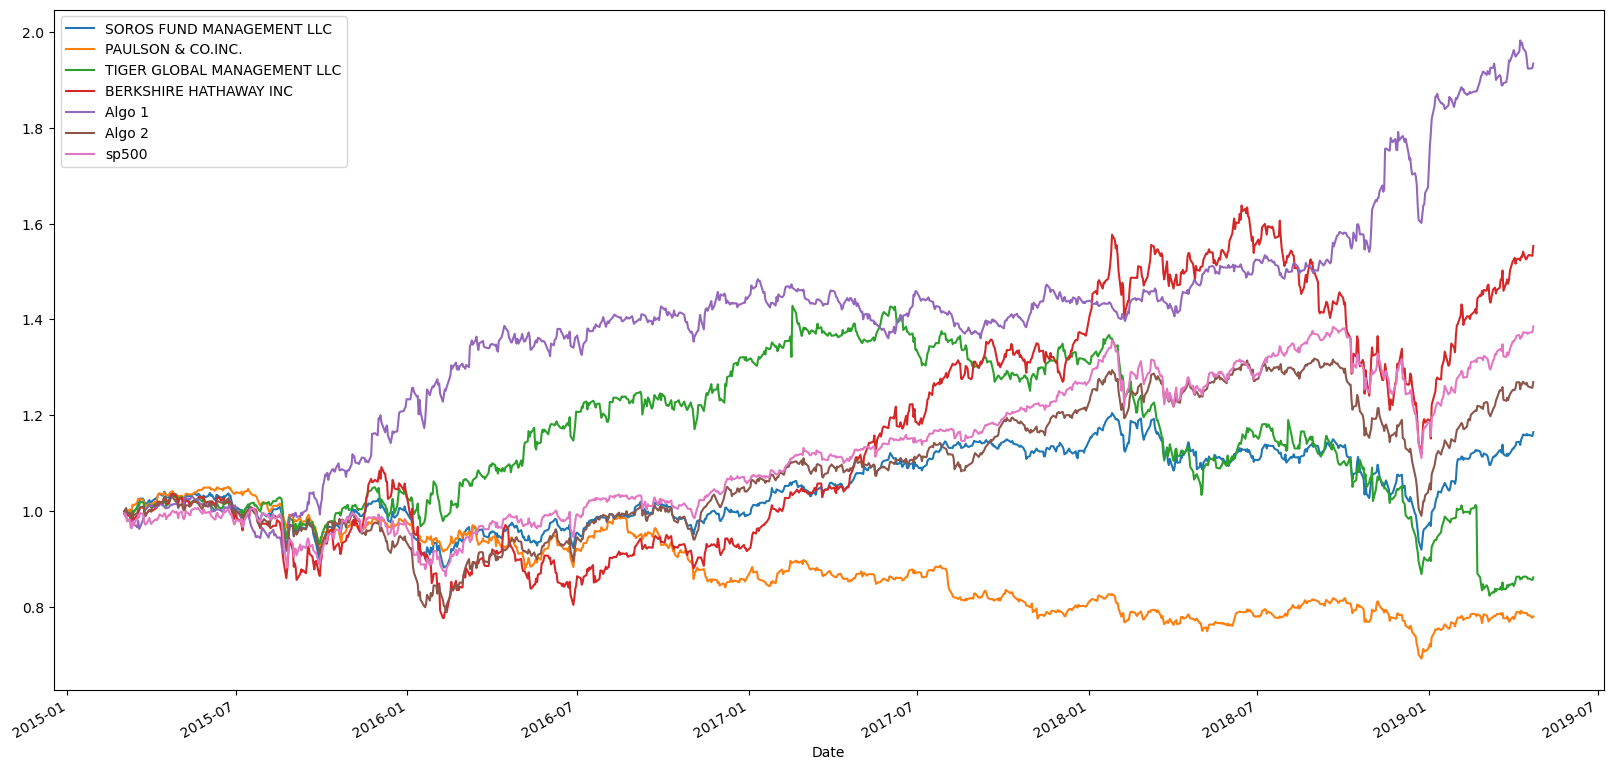

In [18]:
# Calculate cumulative returns of all portfolios
cr = (1 + total_dr).cumprod()
cr.plot(figsize=(20, 10))
# Plot cumulative returns


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

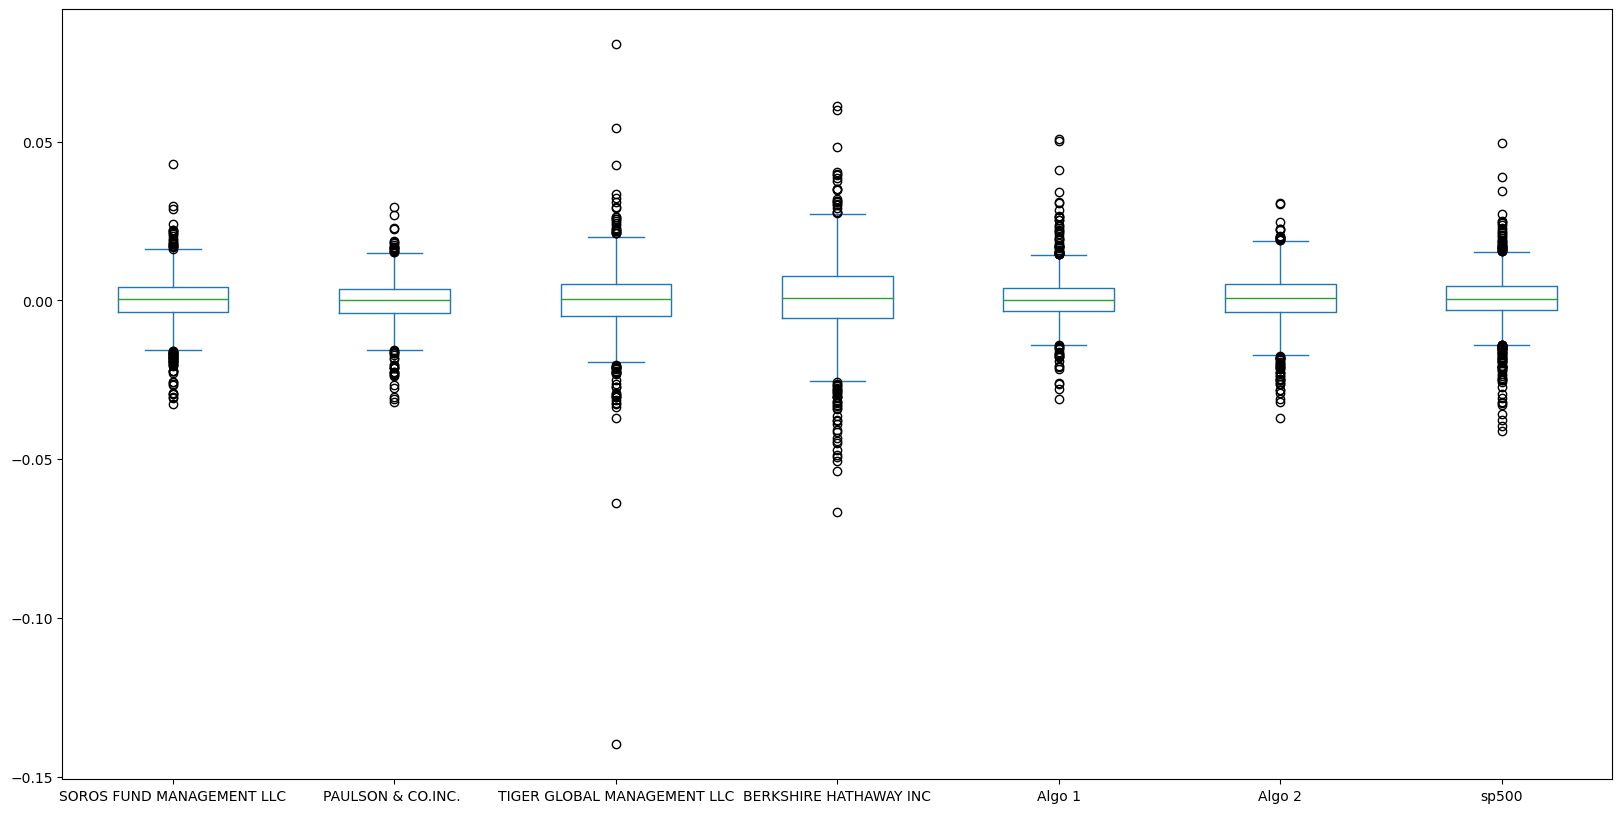

In [19]:
# Box plot to visually show risk
total_dr.plot.box(figsize = (20,10))

### Calculate Standard Deviations

In [43]:
# Calculate the daily standard deviations of all portfolios
daily_std = pd.DataFrame(total_dr.std()).rename(columns = {0:"std"})
daily_std

,std
SOROS FUND MANAGEMENT LLC,0.007895
PAULSON & CO.INC.,0.007023
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919
Algo 1,0.007620
Algo 2,0.008342
sp500,0.008554


### Determine which portfolios are riskier than the S&P 500

In [54]:
# Calculate  the daily standard deviation of S&P 500 
# Determine which portfolios are riskier than the S&P 500
risk_std = daily_std[daily_std["std"] > daily_std.loc["sp500","std"]]
risk_std

,std
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919


### Calculate the Annualized Standard Deviation

In [55]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = total_dr * np.sqrt(252)
annualized_std.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
Date,,,,,,,
2015-03-03,-0.020089,-0.079063,-0.007866,-0.104274,-0.030830,-0.015073,-0.072048
2015-03-04,0.035399,0.051454,-0.040226,0.066880,-0.136343,0.038356,-0.069665
2015-03-05,0.063752,0.064705,0.037379,0.106777,-0.015161,0.068628,0.018987
2015-03-06,-0.125494,-0.056736,-0.134634,-0.207925,-0.078686,-0.181927,-0.225004
2015-03-09,0.009243,0.067076,0.092751,-0.026232,-0.086469,0.020688,0.062616


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

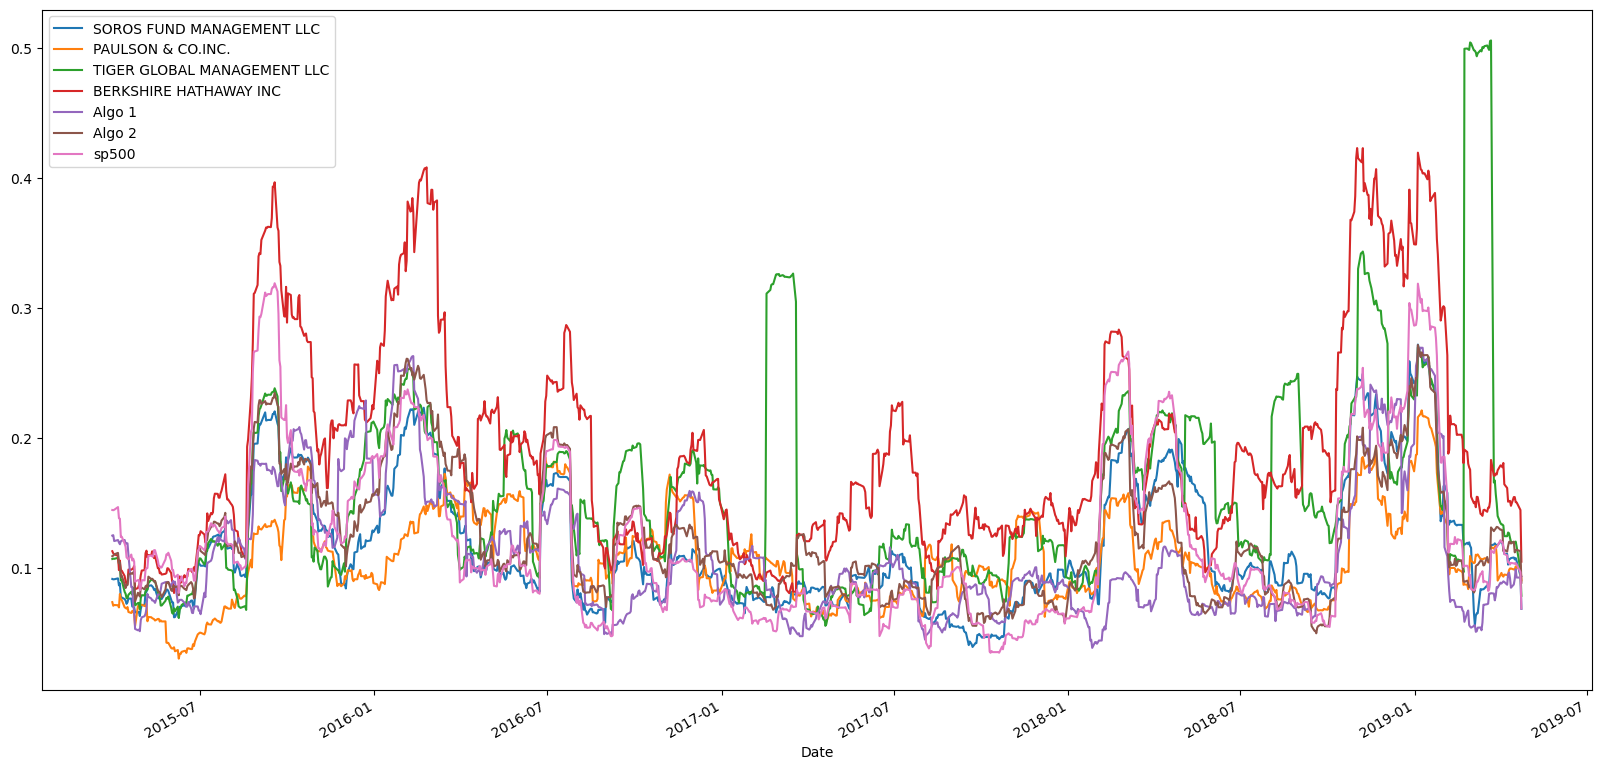

In [66]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
# Plot the rolling standard deviation
annualized_std.rolling(window=21).std().plot(figsize=(20,10))

### Calculate and plot the correlation

In [30]:
correlation_sp500 = pd.DataFrame(total_dr.corr()).loc[:,"sp500"]
correlation_sp500[correlation_sp500==correlation_sp500[correlation_sp500<1].max()]

Algo 2    0.858764
Name: sp500, dtype: float64

<AxesSubplot:xlabel='sp500', ylabel='Algo 2'>

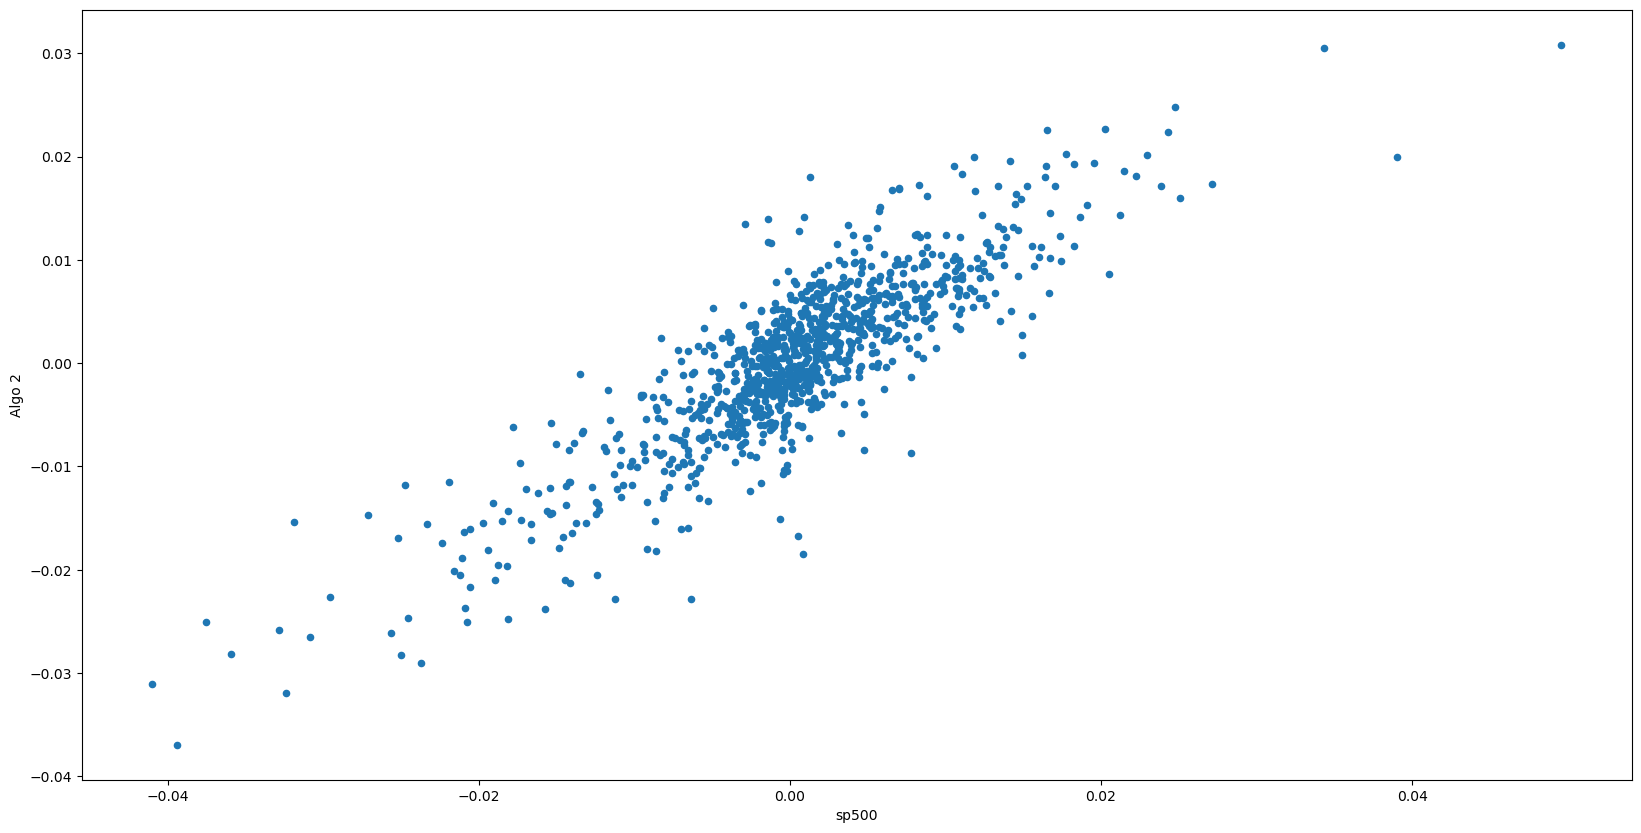

In [31]:
total_dr.plot.scatter(y = "Algo 2", x = "sp500", figsize = (20,10))

In [32]:
# Calculate the correlation
correlation = total_dr.corr()
# Display de correlation matrix
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
sp500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Rolling 60-day Beta of SOROS FUND MANAGEMENT LLC AND sp500'}, xlabel='Date'>

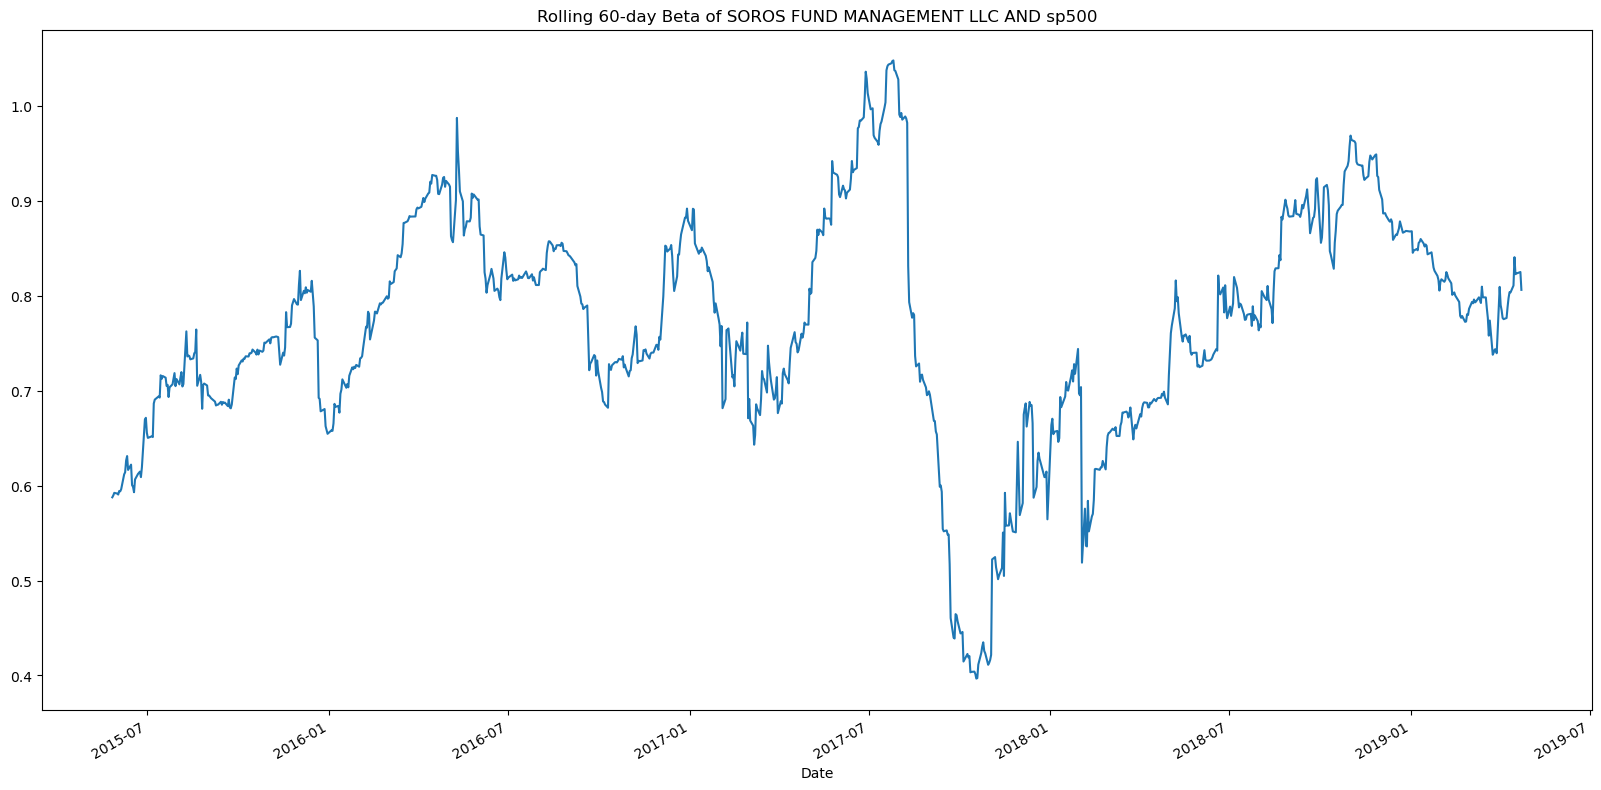

In [33]:
# Calculate covariance of a single portfolio
sfm_covariance = total_dr['SOROS FUND MANAGEMENT LLC'].rolling(window=60).cov(total_dr['sp500'])
# Calculate variance of S&P 500
sp500_variance = sp500_dr['sp500'].rolling(window=60).var()
# Computing beta
sfm_beta = sfm_covariance / sp500_variance
# Plot beta trend
sfm_beta.plot(figsize=(20,10), title="Rolling 60-day Beta of SOROS FUND MANAGEMENT LLC AND sp500")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:xlabel='Date'>

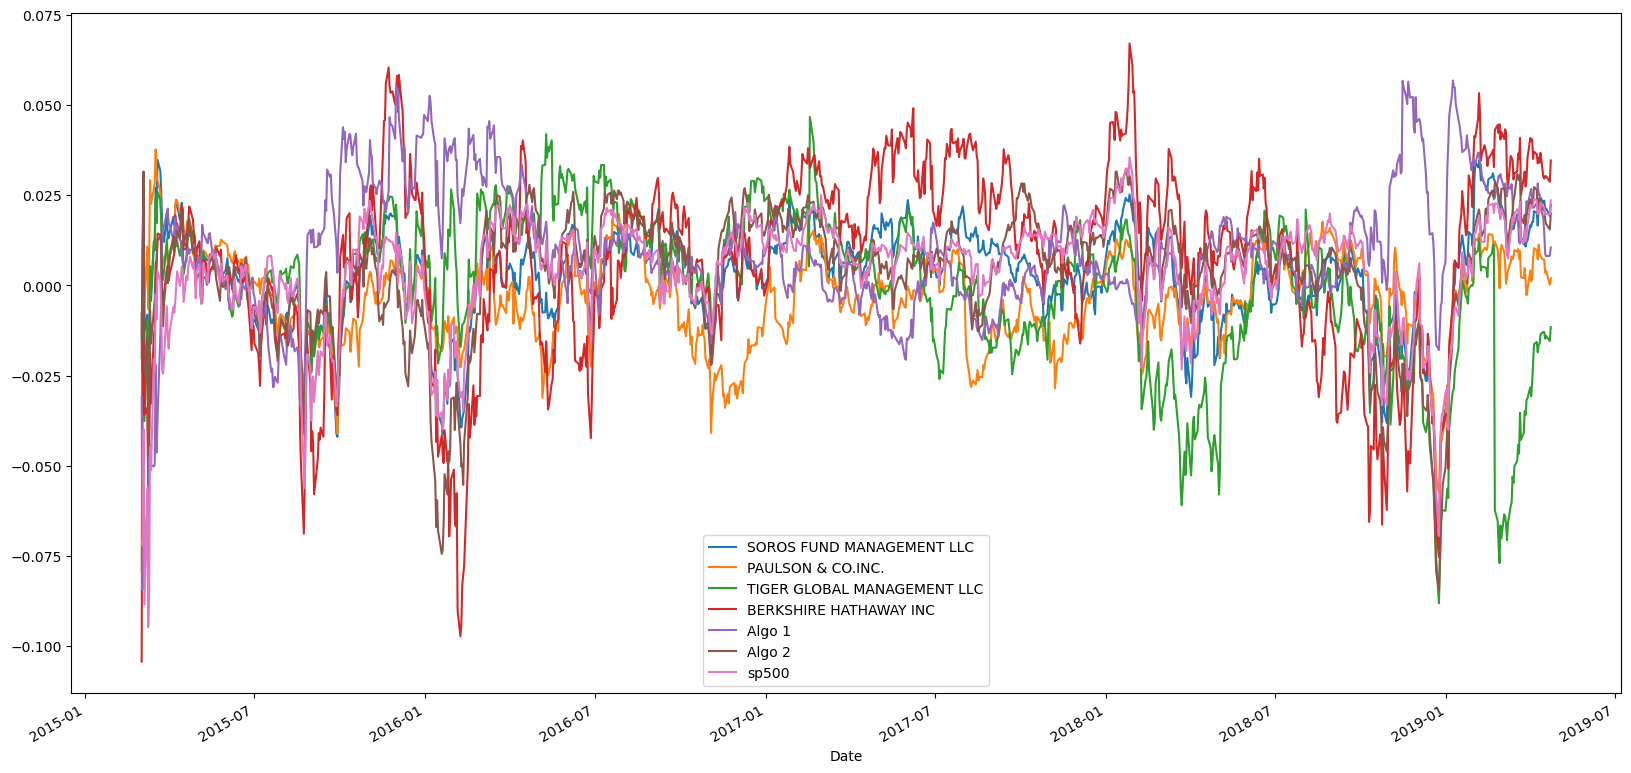

In [68]:
# Use `ewm` to calculate the rolling window
annualized_std.ewm(halflife=21).mean().plot(figsize=(20,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [72]:
# Annualized Sharpe Ratios
sharpe_ratios = (total_dr.mean() * 252) / (total_dr.std() * np.sqrt(252))                

<AxesSubplot:title={'center':'Sharpe Ratios'}>

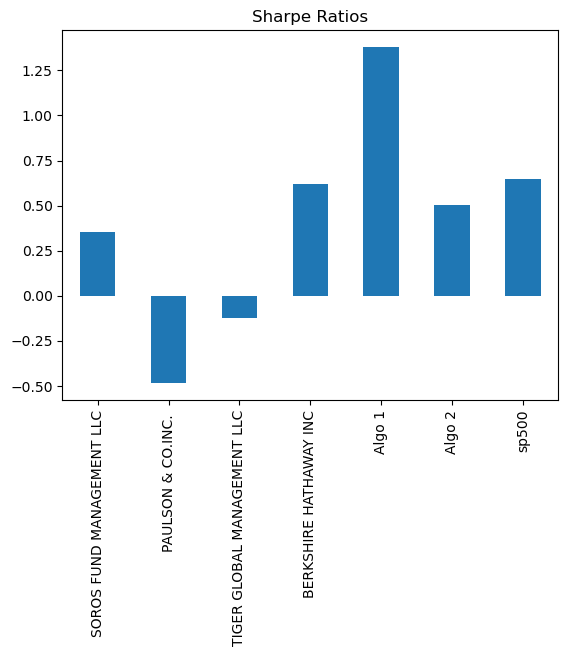

In [77]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.
Write your answer here!
Algo 1: Performed better than expected against the market vastly outperforming them
Algo 2: This algorithm was useful however it fell short and underperformed against BHI and sp500 

---

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [92]:
# Reading data from 1st stock
aapl_his = pd.read_csv(Path("Resources/aapl_historical.csv"), index_col = "Trade DATE", parse_dates = True, infer_datetime_format= True)
aapl_his.rename(columns = {"NOCP":"aapl"}, inplace = True)
aapl_his.head()

,Symbol,aapl
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [93]:
# Reading data from 2nd stock
cost_his = pd.read_csv(Path("Resources/cost_historical.csv"), index_col = "Trade DATE", parse_dates = True, infer_datetime_format= True)
cost_his.rename(columns = {"NOCP":"cost"}, inplace = True)
cost_his.head()

,Symbol,cost
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62


In [94]:
# Reading data from 3rd stock
goog_his = pd.read_csv(Path("Resources/goog_historical.csv"), index_col = "Trade DATE", parse_dates = True, infer_datetime_format= True)
goog_his.rename(columns = {"NOCP":"goog"}, inplace = True)
goog_his.head()

,Symbol,goog
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [132]:
# Combine all stocks in a single DataFrame
portfolio = pd.concat((aapl_his, cost_his, goog_his), axis = "columns" , join='inner')
portfolio.sort_index(ascending = True, inplace = True)
portfolio.head()

,Symbol,aapl,Symbol,cost,Symbol,goog
Trade DATE,,,,,,
2018-05-11,AAPL,188.59,COST,195.76,GOOG,1098.26
2018-05-14,AAPL,188.15,COST,195.88,GOOG,1100.20
2018-05-15,AAPL,186.44,COST,195.48,GOOG,1079.23
2018-05-16,AAPL,188.18,COST,198.71,GOOG,1081.77
2018-05-17,AAPL,186.99,COST,199.60,GOOG,1078.59


In [133]:
# Reset Date index
portfolio.index = portfolio.index.normalize()

In [134]:
# Reorganize portfolio data by having a column per symbol
portfolio = portfolio.drop(columns=["Symbol"])
portfolio

,aapl,cost,goog
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59
...,...,...,...
2019-05-03,211.75,244.62,1185.40
2019-05-06,208.48,244.23,1189.39
2019-05-07,202.86,240.18,1174.10


In [147]:
# Calculate daily returns
portfolio.dropna (inplace=True)
# Drop NAs
portfolio_dr=portfolio.pct_change
# Display sample data
portfolio_dr

<bound method NDFrame.pct_change of               aapl    cost     goog
Trade DATE                         
2018-05-11  188.59  195.76  1098.26
2018-05-14  188.15  195.88  1100.20
2018-05-15  186.44  195.48  1079.23
2018-05-16  188.18  198.71  1081.77
2018-05-17  186.99  199.60  1078.59
...            ...     ...      ...
2019-05-03  211.75  244.62  1185.40
2019-05-06  208.48  244.23  1189.39
2019-05-07  202.86  240.18  1174.10
2019-05-08  202.90  241.34  1166.27
2019-05-09  200.72  243.47  1162.38

[250 rows x 3 columns]>

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [151]:
# Set weights
weights = [1/3, 1/3, 1/3]
# Calculate portfolio return
my_portfolio = portfolio.dot(weights)
portfolio_returns = my_portfolio.pct_change()
# Display sample data
portfolio_returns

Trade DATE
2018-05-11         NaN
2018-05-14    0.001093
2018-05-15   -0.015550
2018-05-16    0.005140
2018-05-17   -0.002370
                ...   
2019-05-03    0.016922
2019-05-06    0.000201
2019-05-07   -0.015200
2019-05-08   -0.004100
2019-05-09   -0.002446
Length: 250, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [153]:
# Join your returns DataFrame to the original returns DataFrame
all_portfolio_returns = pd.concat((portfolio_returns, total_dr), axis = "columns", join="inner")
all_portfolio_returns.rename(columns = {0:"portfolio"}, inplace = True)
all_portfolio_returns

,portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
2018-05-11,NaN,-0.004717,0.000982,0.002624,-0.004125,0.000358,0.000281,0.001708
2018-05-14,0.001093,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884
2018-05-15,-0.015550,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842
2018-05-16,0.005140,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061
2018-05-17,-0.002370,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856
...,...,...,...,...,...,...,...,...
2019-04-16,0.003036,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,0.007962,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.000599,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579
2019-04-22,0.006376,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012


In [154]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_portfolio_returns.dropna(inplace = True)
all_portfolio_returns

,portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
2018-05-14,0.001093,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884
2018-05-15,-0.015550,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842
2018-05-16,0.005140,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061
2018-05-17,-0.002370,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856
2018-05-18,-0.009248,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632
...,...,...,...,...,...,...,...,...
2019-04-16,0.003036,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,0.007962,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.000599,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579
2019-04-22,0.006376,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [160]:
# Calculate the annualized `std`
all_std = all_portfolio_returns * np.sqrt(252)
all_std

,portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
2018-05-14,0.017346,0.000000,0.000000,0.000000,0.000000,0.014523,0.025952,0.014025
2018-05-15,-0.246851,-0.011523,-0.022364,-0.050632,-0.231862,-0.018014,-0.018078,-0.108616
2018-05-16,0.081592,0.137112,0.099126,0.086985,0.068418,-0.036931,0.053034,0.064459
2018-05-17,-0.037615,-0.031042,0.040065,-0.099488,-0.081591,-0.110316,0.082625,-0.013586
2018-05-18,-0.146808,-0.069171,-0.042424,-0.203700,-0.035113,0.040597,-0.039629,-0.041785
...,...,...,...,...,...,...,...,...
2019-04-16,0.048195,0.042852,0.006162,-0.013191,0.013282,-0.110244,0.046027,0.008086
2019-04-17,0.126391,-0.045984,-0.102663,-0.069998,0.051150,-0.163524,-0.082994,-0.036095
2019-04-18,0.009515,0.022985,0.019396,0.009232,0.030417,-0.009333,-0.019513,0.025067
2019-04-22,0.101214,-0.041047,-0.116402,-0.057787,-0.017268,0.010740,-0.030728,0.016066


### Calculate and plot rolling `std` with 21-day window

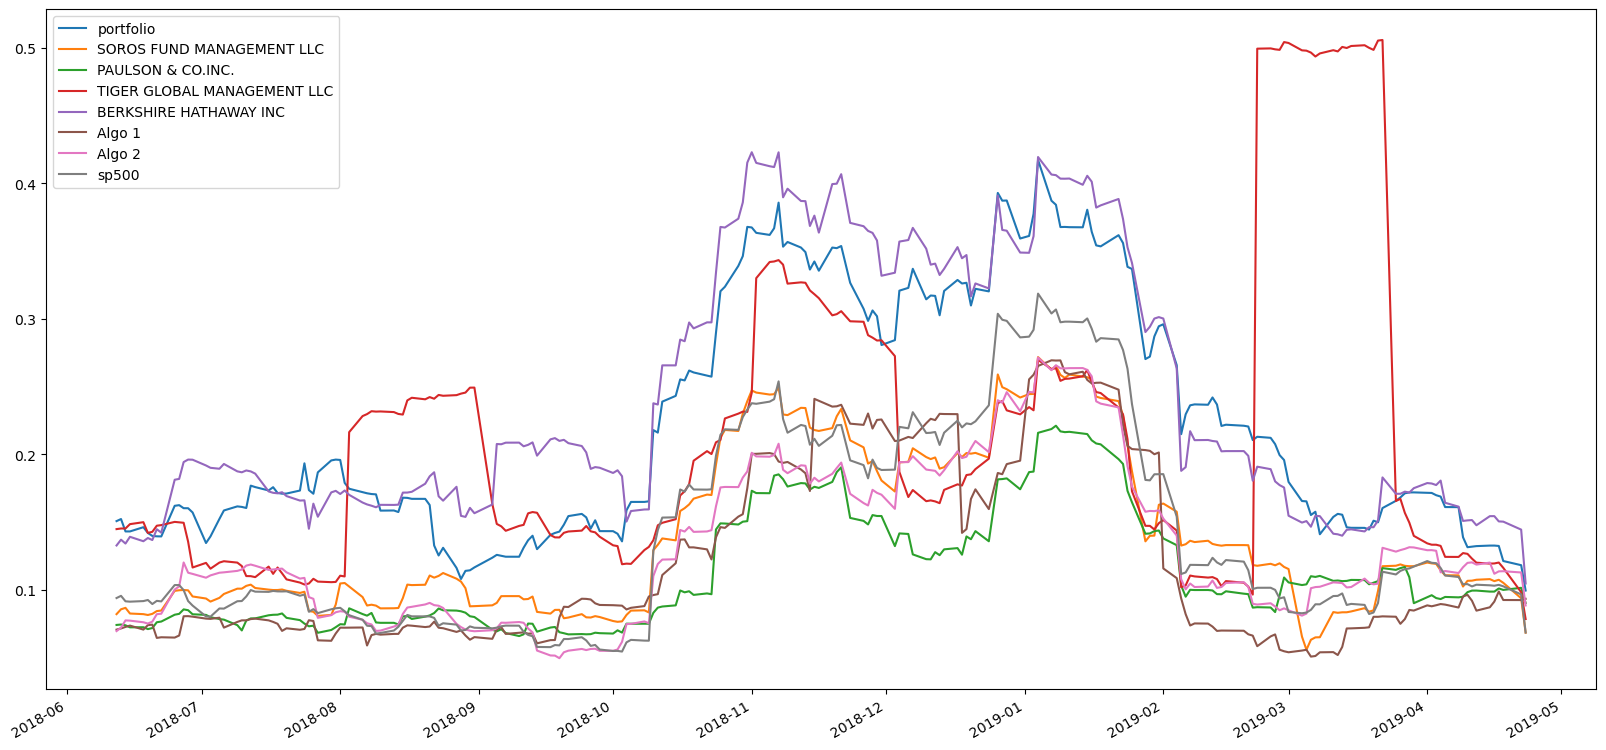

In [161]:
# Calculate rolling standard deviation
# Plot rolling standard deviation
all_std.rolling(window=21).std().plot(figsize=(20,10)).get_figure().savefig("rolling_std.png")

### Calculate and plot the correlation

In [162]:
# Calculate and plot the correlation
all_correlation = all_std.corr()
all_correlation

,portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
portfolio,1.000000,0.724218,0.606450,0.340536,0.841143,0.275728,0.725587,0.847217
SOROS FUND MANAGEMENT LLC,0.724218,1.000000,0.791962,0.478627,0.816675,0.337826,0.862846,0.876981
PAULSON & CO.INC.,0.606450,0.791962,1.000000,0.485375,0.650758,0.361301,0.783656,0.766680
TIGER GLOBAL MANAGEMENT LLC,0.340536,0.478627,0.485375,1.000000,0.325457,0.114554,0.409496,0.481030
BERKSHIRE HATHAWAY INC,0.841143,0.816675,0.650758,0.325457,1.000000,0.327000,0.782804,0.852303
Algo 1,0.275728,0.337826,0.361301,0.114554,0.327000,1.000000,0.365512,0.289358
Algo 2,0.725587,0.862846,0.783656,0.409496,0.782804,0.365512,1.000000,0.875721
sp500,0.847217,0.876981,0.766680,0.481030,0.852303,0.289358,0.875721,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [164]:
# Calculate and plot Beta
personal_covariance = all_portfolio_returns['portfolio'].cov(all_portfolio_returns["sp500"])
personal_variance = all_portfolio_returns["sp500"].var()
personal_beta = personal_covariance / personal_variance
print(f'beta of potfolio is: {personal_beta}')

beta of potfolio is: 1.2748535007463608


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [167]:
# Calculate Annualized Sharpe Ratios
all_sharpe_ratio = ((all_portfolio_returns.std()*np.sqrt(252)))

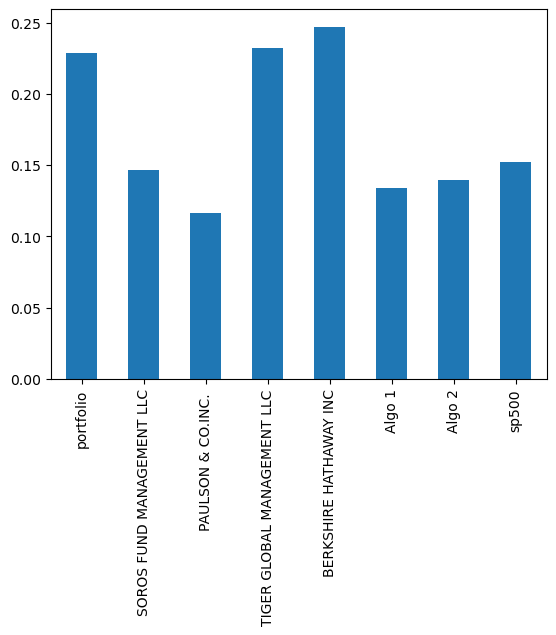

In [168]:
# Visualize the sharpe ratios as a bar plot
all_sharpe_ratio.plot(kind="bar").get_figure().savefig('All Sharpe Ratios.png')

### How does your portfolio do?

Write your answer here!

In [ ]:
My portfolio is to my satisfaction, seeing as outperformed the other companies and exceeded to be better than the two algorithms. Although I believe it can be improved, it still 3rd most profitable portfolio.